# 화장품 리뷰 데이터

## 1. 데이터 분석 목적성 및 수집

30,000개의 데이터를 6개의 카테고리로 분류하기

In [2]:
import pandas as pd

beauty = pd.read_excel('beauty_data_sample.xlsx')

In [3]:
beauty

,category,contents
0,감촉,사용감이좋아서 재구매하는것이구요한가지불편한것은화장품병뚜껑이헐거워병을 화장대에 떨어...
1,향기,크기도 들고다니기 적당하고 향도 너무 좋네요 . 늘 록시*만 썼었는데 갈아타야겠어...
2,가격,좋은제품 싸게 잘샀네요 최저가로 산듯
3,향기,향도 좋고 발색도 잘 됩니다.
4,가격,저렴하고 딱 좋아요 가성비 좋아요 저렴하고 딱 좋아요 저렴하고 딱 좋아요 저렴하...
...,...,...
29995,디자인,단델리온할까하다가 나이도 있고 피부톤도 어둡고해서 이제품을 택했는데..정말 이쁘고...
29996,디자인,디자인은 별하나 뺐어요~ 너무 이쁜데~ 제가 좋아하는 감촉이 아니라서? 이건 그런...
29997,디자인,선물 포장 너무 깔끔하고 예쁘고 무엇보다 배송에 신경 써주셔서 제 때에 선물할 ...
29998,디자인,언제나 이용하고 있습니다. 가격대비 추천합니다 ! 생각보다 좋은거 같아요. 잘 ...


## 2. 훈련 세트, 테스트 세트 분리

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(beauty.contents, beauty.category, test_size=0.2, stratify=beauty.category, random_state=0)

## 3. 훈련 세트의 Contents 값 자연어처리

### 데이터 세트의 매핑 테이블

In [5]:
import os
import sys
import logging
import re

_SCRIPT_DIR = os.path.abspath(os.path.dirname('__file__'))
sys.path.insert(0, os.path.abspath(_SCRIPT_DIR))

_KC_DIR = os.path.join(_SCRIPT_DIR, 'keyterm_client_py3')
sys.path.insert(0, os.path.abspath(_KC_DIR))

from keyterm_client_py3.keyterm_client import KeytermClient

kc = KeytermClient()

In [6]:
# 'AJMA',        # 형용사
# 'NNIN1',       # 고유명사
# 'NNIN2',       # 일반명사
# 'VBMA',        # 동사

split_sentence = []
split_sentence2 = []
for idx, contents in enumerate(X_train.values):
    data = kc.get_morphemes(body=contents, filter_option=['AJMA','NNIN1','NNIN2','VBMA'])
    split_sentence.append(data)
    split_sentence2.extend(data)

In [7]:
split_sentence

[['빠르다', '배송', '저렴하다', '가격', '좋다'],
 ['저렴하다', '가격', '사다', '좋다', '사용하다', '쓰다', '같다', '배송', '기다리다', '보람', '있다'],
 ['예쁘다',
  '좋다',
  '하루',
  '종일',
  '화장',
  '고치다',
  '색',
  '남다',
  '진하다',
  '부르주아',
  '화이트',
  '펄',
  '바르다',
  '이쁘다',
  '상품평',
  '보다',
  '구입하다',
  '되다',
  '배송료',
  '합치다',
  '백화점',
  '싸다',
  '도움',
  '되시길색',
  '밑에분',
  '말',
  '팥색',
  '같다',
  '한데',
  '연하다',
  '분홍',
  '펴바르',
  '쌍꺼풀',
  '라인',
  '바르다',
  '괜찮다'],
 ['가을',
  '겨울',
  '쓰다',
  '제품',
  '흡수',
  '잘되다',
  '끈적임',
  '없',
  '깔끔하다',
  '얼굴',
  '당기다',
  '없다',
  '아침',
  '비비',
  '크림',
  '섞다',
  '바르다',
  '촉촉하다',
  '넘',
  '좋다',
  '검색하다',
  '여기',
  '샘플도',
  '많다',
  '저렴하다',
  '구입하다',
  '트러블',
  '피부',
  '불구하다',
  '트러블',
  '없',
  '완전',
  '좋다',
  '제품',
  '양',
  '적다'],
 ['배송',
  '중',
  '뜨다',
  '실제',
  '받다',
  '걸리다',
  '틴트',
  '제품',
  '맘',
  '들다',
  '틴트',
  '같다',
  '않',
  '달라붙다',
  '느낌',
  '향',
  '좋다'],
 ['저렴하다',
  '가격',
  '구성',
  '살다',
  '있다',
  '좋다',
  '적극',
  '추천하다',
  '디자인',
  '이쁘다',
  '굿굿굿',
  '노랗다',
  '피부',
  '아이보리',
  '웜',
  '구입하다'],
 

In [8]:
# split_sentence2

In [9]:
# split_sentence_dup = list(set(split_sentence2))

# mapping_table = {}
# for idx, term in enumerate(split_sentence_dup):
#     mapping_table[term] = idx

# print(mapping_table)

### 단어 빈도수 세기

In [10]:
# term_count = {}
# for idx, sentence in enumerate(split_sentence2):
#     term_count[sentence] = split_sentence2.count(sentence)

In [11]:
# term_count

In [12]:
# sorted_term_count = sorted(term_count.items(), key=lambda  x: x[1], reverse=True)
# sorted_term_count

In [13]:
# print(len(mapping_table))
# print(len(term_count))

In [14]:
# # mappint_table의 키 값 = term_count의 키 값 -> { 인덱스 : 개수 }
# count_mapping_table = {}
# for idx, mt in enumerate(mapping_table):
#     for jdx, tc in enumerate(term_count):    
#         if mt == tc:
#             count_mapping_table[idx] = term_count[tc]

# print(count_mapping_table)

In [15]:
# sorted_mapping_table = sorted(count_mapping_table.items(), key=lambda  x: x[1], reverse=True)
# sorted_mapping_table

In [16]:
# len(sorted_mapping_table)

### 워드 임베딩

#### Word2Vec

In [17]:
from gensim.models import Word2Vec
import numpy as np

# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기(중심 단어를 예측하기 위해 앞, 뒤의 단어 범위)
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

# 차원 수를 5000으로 줄이기
# CBOW: 주변 단어를 이용해 타겟 단어를 예측
# Skip-gram: 타겟 단어를 이용해 주변 단어를 예측

# window 값은 한 줄의 평균 길이
length_sentence = []
for idx, sentence in enumerate(split_sentence):
    length_sentence.append(len(sentence))

np.mean(length_sentence)

12.970041666666667

In [18]:
# 평균 길이가 12개이므로 앞, 뒤로 나눠서 6개의 사이즈가 적절
model = Word2Vec(split_sentence, size=256, iter=3, window=6, negative=5, min_count=1, workers=4, sg=0)
model_name = 'beauty_word2vec_model'
model.save(model_name)

In [19]:
# 텍스트에 해당되는 벡터
vectors = model.wv
vocabs = vectors.vocab.keys() # 대표 단어(중복 x)
print(len(vocabs))

16871


In [20]:
word_vectors_list = [vectors for vectors in vectors[vocabs]]
print(len(word_vectors_list))

16871


총 24,000줄의 훈련 데이터 안에 있는 16871개의 단어를 워드투벡터를 이용해(워드 임베딩) 각 단어의 벡터값을 구함. 각 단어의 차원수는 원래는 16871개 일테지만, size를 256로 줄여서 차원수는 256개가 됨.

#### 매핑 테이블을 이용해 데이터 맞추기

현재 훈련 데이터는 24,000줄의 단어로 이루어져 있기 때문에 각 줄마다의 단어를 위에서 구한 벡터의 값으로 채워주어야 함.

In [21]:
# 1. X_train 데이터의 문장을 위에서 구한 split_sentence로 바꿔주기
X_train_new = pd.DataFrame(columns=['vocabs', 'vectors'])
X_train_new['vocabs'] = split_sentence

In [22]:
X_train_new

,vocabs,vectors
0,"[빠르다, 배송, 저렴하다, 가격, 좋다]",NaN
1,"[저렴하다, 가격, 사다, 좋다, 사용하다, 쓰다, 같다, 배송, 기다리다, 보람,...",NaN
2,"[예쁘다, 좋다, 하루, 종일, 화장, 고치다, 색, 남다, 진하다, 부르주아, 화...",NaN
3,"[가을, 겨울, 쓰다, 제품, 흡수, 잘되다, 끈적임, 없, 깔끔하다, 얼굴, 당기...",NaN
4,"[배송, 중, 뜨다, 실제, 받다, 걸리다, 틴트, 제품, 맘, 들다, 틴트, 같다...",NaN
...,...,...
23995,"[저렴하다, 산거, 같다, 좋다]",NaN
23996,"[화장, 오래가다, 흰색, 프라이머, 정력, 좋다, 건조하다, 느낌, 있지, 뜨다,...",NaN
23997,"[쓰다, 리필, 팔다, 저렴하다, 좋다]",NaN
23998,"[팩트, 향, 좋다, 순수하다, 느낌, 매끈하다, 깨끗하다, 피뷰, 기대하다]",NaN


In [23]:
# 2. X_train_new 데이터에 매핑된 단어의 벡터값을 추가

# X_train_new: 중복되는 단어가 포함된 24,000줄의 데이터프레임
# vocabs: 중복되지 않은 16871개의 단어
# scaled_word_vectors_list: 중복되지 않은 16871개의 단어의 256차원 벡터값
vectors_data = []
for idx, train_data in enumerate(X_train_new['vocabs']):
    tmp = []
    for t in train_data:
        tmp.append(vectors[t].tolist())
    vectors_data.append(np.mean(tmp, axis=0).tolist())

X_train_new['vectors'] = vectors_data

In [24]:
# 3. vocabs와 vectors를 가지고 있는 새로운 데이터프레임
X_train_new['vectors']

0        [0.11334378719329834, -0.11153968870639801, -0...
1        [0.08660551471720365, -0.22928801153532483, -0...
2        [0.03472118254446994, -0.16443905672187814, -0...
3        [0.07614881552419522, -0.2898943489158733, -0....
4        [0.04647999664987711, -0.19455396362087307, -0...
                               ...                        
23995    [0.09243343770503998, -0.1853017471730709, -0....
23996    [0.05222354537874062, -0.21309218653327516, -0...
23997    [0.10188550911843777, -0.18989450708031655, -0...
23998    [0.03774087434996747, -0.15687360164398947, -0...
23999    [0.08834029568566217, -0.22280762427383, -0.54...
Name: vectors, Length: 24000, dtype: object

### 최종 훈련 데이터프레임

In [25]:
# 타겟 데이터 매핑 테이블
target_names = list(set(y_train.values))
print(target_names)

target_mapping_table = {}
for idx, names in enumerate(target_names):
    target_mapping_table[names] = idx

['향기', '색상', '용량', '감촉', '디자인', '가격']


In [26]:
# 타겟 데이터프레임 생성
target_df = pd.DataFrame(columns=['target'])

for idx, target in enumerate(y_train.values):
    for key, value in target_mapping_table.items():
        if target == key:
            target_df.loc[idx, 'target'] = value

target_df = target_df.astype(int)

In [27]:
target_df

,target
0,5
1,5
2,4
3,2
4,0
...,...
23995,5
23996,1
23997,5
23998,0


In [28]:
X_train_final = pd.concat([X_train_new, target_df], axis=1)

In [29]:
X_train_final

,vocabs,vectors,target
0,"[빠르다, 배송, 저렴하다, 가격, 좋다]","[0.11334378719329834, -0.11153968870639801, -0...",5
1,"[저렴하다, 가격, 사다, 좋다, 사용하다, 쓰다, 같다, 배송, 기다리다, 보람,...","[0.08660551471720365, -0.22928801153532483, -0...",5
2,"[예쁘다, 좋다, 하루, 종일, 화장, 고치다, 색, 남다, 진하다, 부르주아, 화...","[0.03472118254446994, -0.16443905672187814, -0...",4
3,"[가을, 겨울, 쓰다, 제품, 흡수, 잘되다, 끈적임, 없, 깔끔하다, 얼굴, 당기...","[0.07614881552419522, -0.2898943489158733, -0....",2
4,"[배송, 중, 뜨다, 실제, 받다, 걸리다, 틴트, 제품, 맘, 들다, 틴트, 같다...","[0.04647999664987711, -0.19455396362087307, -0...",0
...,...,...,...
23995,"[저렴하다, 산거, 같다, 좋다]","[0.09243343770503998, -0.1853017471730709, -0....",5
23996,"[화장, 오래가다, 흰색, 프라이머, 정력, 좋다, 건조하다, 느낌, 있지, 뜨다,...","[0.05222354537874062, -0.21309218653327516, -0...",1
23997,"[쓰다, 리필, 팔다, 저렴하다, 좋다]","[0.10188550911843777, -0.18989450708031655, -0...",5
23998,"[팩트, 향, 좋다, 순수하다, 느낌, 매끈하다, 깨끗하다, 피뷰, 기대하다]","[0.03774087434996747, -0.15687360164398947, -0...",0


### 훈련 데이터 시각화 - tSNE

In [30]:
X_train_final_data = np.array(X_train_final['vectors'].tolist())
labels = X_train_final['target'].values

In [31]:
X_train_final_data.shape

(24000, 256)

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_train_final_data)

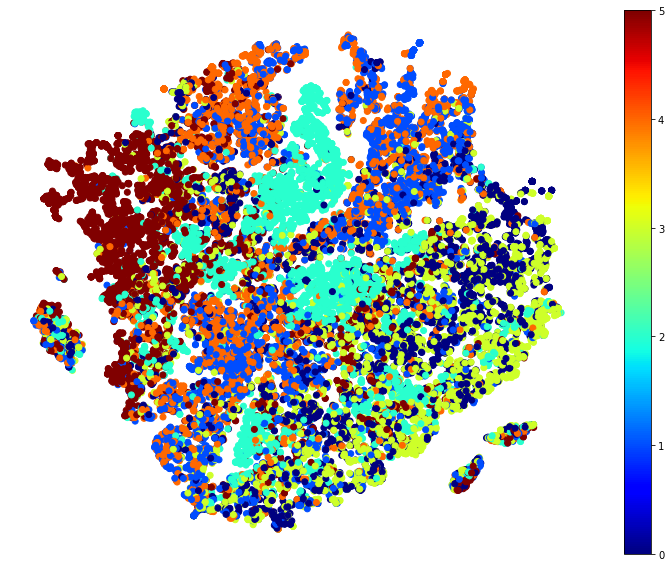

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap="jet")
plt.axis("off")
plt.colorbar()

plt.show()

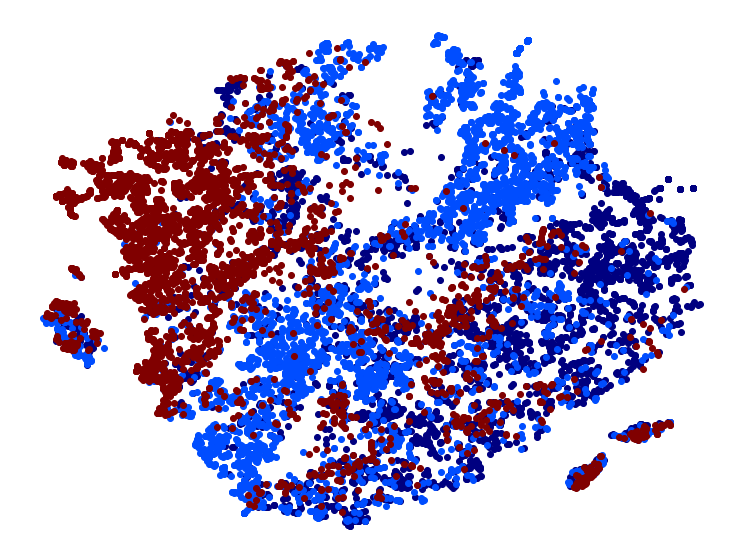

In [34]:
import matplotlib

plt.figure(figsize=(13, 10))
cmap = matplotlib.cm.get_cmap("jet")

for label in (0, 1, 5):
    plt.scatter(tsne_results[labels==label, 0], tsne_results[labels==label, 1], c=cmap(label/5))

plt.axis("off")
plt.show()

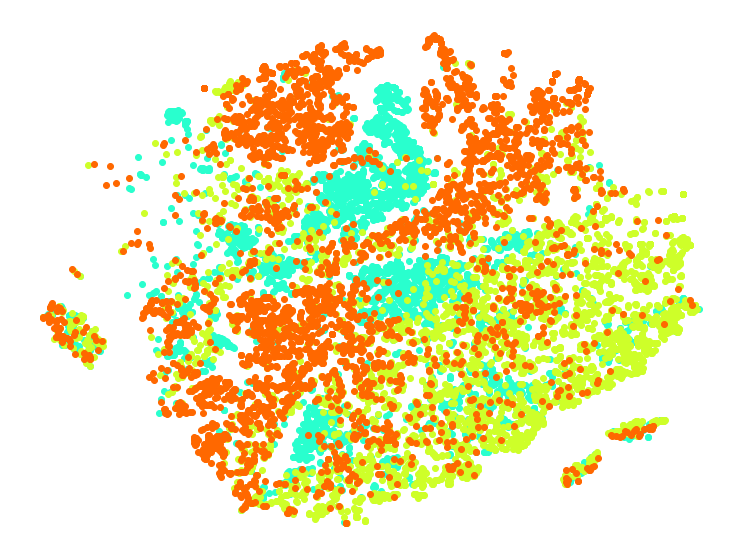

In [35]:
import matplotlib

plt.figure(figsize=(13, 10))
cmap = matplotlib.cm.get_cmap("jet")

for label in (2, 3, 4):
    plt.scatter(tsne_results[labels==label, 0], tsne_results[labels==label, 1], c=cmap(label/5))

plt.axis("off")
plt.show()

## 4. 모델 선택과 훈련

### 로지스틱 회귀, 서포트벡터머신, 의사결정나무, 랜덤포레스트

#### 다중공선성 확인

In [58]:
# 상관관계를 확인하기 위한 새로운 데이터프레임 생성
tmp_df = pd.DataFrame(vectors_data, columns=[str(i) for i in range(256)])
tmp_df = pd.concat([tmp_df, target_df], axis=1)

tmp_df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,target
0,0.113344,-0.111540,-0.626907,0.566661,-0.668935,-0.264101,0.415229,-0.408456,-0.603709,-0.103959,...,0.576471,0.242267,0.220496,-0.180793,-0.349533,-0.556765,0.120360,-0.958727,-0.305985,5
1,0.086606,-0.229288,-0.467057,0.446081,-0.374727,-0.116017,0.282572,-0.334924,-0.551879,-0.074198,...,0.510195,0.311078,0.206413,-0.192712,-0.208087,-0.464742,0.163652,-0.650646,-0.170678,5
2,0.034721,-0.164439,-0.204823,0.347492,-0.165124,-0.176790,0.069788,-0.287945,-0.356173,-0.109217,...,0.391947,0.336951,0.143109,-0.182585,-0.024205,-0.306907,0.121783,-0.284590,-0.145961,4
3,0.076149,-0.289894,-0.332297,0.350022,-0.131385,-0.077143,0.184797,-0.261272,-0.548217,-0.134389,...,0.502005,0.407164,0.242399,-0.225294,-0.058000,-0.378287,0.194771,-0.403927,-0.045707,2
4,0.046480,-0.194554,-0.332428,0.401709,-0.308074,-0.253444,0.129866,-0.377099,-0.509635,-0.119888,...,0.471513,0.426213,0.184314,-0.218126,-0.100095,-0.341140,0.169448,-0.429288,-0.118839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.092433,-0.185302,-0.533627,0.469367,-0.455473,-0.123309,0.318990,-0.338970,-0.584171,-0.090994,...,0.564138,0.302822,0.236281,-0.191885,-0.235531,-0.464008,0.163964,-0.671491,-0.174725,5
23996,0.052224,-0.213092,-0.206097,0.263823,-0.056826,-0.055877,0.096677,-0.191066,-0.362428,-0.097142,...,0.357354,0.308853,0.169078,-0.166724,-0.007544,-0.258903,0.136954,-0.251436,-0.040678,1
23997,0.101886,-0.189895,-0.494908,0.468255,-0.414742,-0.108201,0.308298,-0.327578,-0.528798,-0.074015,...,0.524889,0.280423,0.203882,-0.180957,-0.208862,-0.440695,0.139742,-0.668258,-0.186569,5
23998,0.037741,-0.156874,-0.218269,0.257185,-0.138103,-0.133503,0.068808,-0.216992,-0.377040,-0.119463,...,0.359247,0.347014,0.191043,-0.178281,-0.031681,-0.227991,0.147434,-0.228668,-0.031579,0


In [36]:
# # 히트맵으로 상관관계 확인
# import seaborn as sns

# plt.figure(figsize=(15, 15))
# cmap = sns.light_palette("red", as_cmap=True)
# sns.set(font_scale=0.8)
# sns.heatmap(tmp_df.corr(), annot=True, cmap=cmap)
# plt.show()

#### 벡터 데이터 스케일링

In [38]:
# 위에서 구해진 vectors값을 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_vectors_data = scaler.fit_transform(vectors_data)

In [39]:
print(scaled_vectors_data.shape)

print(np.mean(scaled_vectors_data))
print(np.var(scaled_vectors_data))
print(np.std(scaled_vectors_data))

(24000, 256)
-5.610130415778513e-16
0.9999999999999987
0.9999999999999993


#### 차원 축소(PCA)

In [40]:
# 차원 축소 사용(PCA)
from sklearn.decomposition import PCA

X_scaled = scaled_vectors_data

pca = PCA()
X_pca_reduced = pca.fit_transform(X_scaled)
X_pca_reduced.shape

(24000, 256)

In [41]:
pca.explained_variance_ratio_

array([3.17035143e-01, 2.53399442e-01, 2.13563220e-01, 1.09803666e-01,
       5.87148197e-02, 2.94103981e-02, 7.26994395e-03, 2.37711367e-03,
       2.18342281e-03, 1.56288516e-03, 1.45674472e-03, 1.04182222e-03,
       6.53313591e-04, 5.75372989e-04, 2.90296436e-04, 2.27049565e-04,
       1.20586678e-04, 7.32278746e-05, 5.13546409e-05, 2.86034703e-05,
       2.50951412e-05, 1.79454774e-05, 1.39138506e-05, 1.21759696e-05,
       9.89101178e-06, 8.11745295e-06, 6.59423481e-06, 5.83819896e-06,
       5.58464665e-06, 4.74919153e-06, 4.66348032e-06, 3.52647236e-06,
       3.20284099e-06, 3.00930759e-06, 2.60813057e-06, 2.29152909e-06,
       2.18197043e-06, 1.88960585e-06, 1.68293823e-06, 1.58433658e-06,
       1.37970805e-06, 1.20729554e-06, 1.16190148e-06, 1.07329555e-06,
       1.00432257e-06, 9.28696553e-07, 8.27405455e-07, 8.16436180e-07,
       7.23200398e-07, 6.55832853e-07, 6.29329001e-07, 6.23962384e-07,
       5.73393502e-07, 5.28431184e-07, 5.06997222e-07, 4.69243810e-07,
      

In [42]:
# 95%의 분산을 보존하면서 원하는 PCs(주성분) 구하기
pca.explained_variance_ratio_.cumsum()

array([0.31703514, 0.57043458, 0.7839978 , 0.89380147, 0.95251629,
       0.98192669, 0.98919663, 0.99157375, 0.99375717, 0.99532005,
       0.9967768 , 0.99781862, 0.99847193, 0.99904731, 0.9993376 ,
       0.99956465, 0.99968524, 0.99975847, 0.99980982, 0.99983843,
       0.99986352, 0.99988147, 0.99989538, 0.99990756, 0.99991745,
       0.99992557, 0.99993216, 0.999938  , 0.99994358, 0.99994833,
       0.999953  , 0.99995652, 0.99995972, 0.99996273, 0.99996534,
       0.99996763, 0.99996982, 0.9999717 , 0.99997339, 0.99997497,
       0.99997635, 0.99997756, 0.99997872, 0.99997979, 0.9999808 ,
       0.99998173, 0.99998255, 0.99998337, 0.99998409, 0.99998475,
       0.99998538, 0.999986  , 0.99998658, 0.99998711, 0.99998761,
       0.99998808, 0.99998847, 0.99998886, 0.99998922, 0.99998956,
       0.99998989, 0.9999902 , 0.99999051, 0.9999908 , 0.99999107,
       0.99999132, 0.99999156, 0.99999179, 0.99999202, 0.99999224,
       0.99999245, 0.99999265, 0.99999283, 0.99999302, 0.99999

In [43]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수: ', d)

선택할 차원 수:  5


In [44]:
# 위에서 구한 식을 통해 5개의 주성분을 추출할 수 있다
pca_data = X_pca_reduced[:, :5]
pca_data.shape

(24000, 5)

In [45]:
pca_data[:5, :]

array([[-22.91735247,   2.20162323, -16.77791558,   1.08985082,
         -7.34031847],
       [ -7.67990789,   5.60915388,  -7.46575148,   0.13154337,
         -0.98209735],
       [ 10.70535037,  -4.83787605,  -0.82396277,   3.47160507,
          0.94937495],
       [  4.12587213,   7.80216018,   4.82673963,   1.1297462 ,
          0.99450676],
       [  0.85482538,  -2.19235795,   1.26553929,   0.49101426,
         -1.04260543]])

In [46]:
# 차원 축소를 한 새로운 데이터프레임 생성
pca_df = pd.DataFrame(pca_data, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

In [47]:
pca_df['target'] = target_df

In [48]:
pca_df

,pc1,pc2,pc3,pc4,pc5,target
0,-22.917352,2.201623,-16.777916,1.089851,-7.340318,5
1,-7.679908,5.609154,-7.465751,0.131543,-0.982097,5
2,10.705350,-4.837876,-0.823963,3.471605,0.949375,4
3,4.125872,7.802160,4.826740,1.129746,0.994507,2
4,0.854825,-2.192358,1.265539,0.491014,-1.042605,0
...,...,...,...,...,...,...
23995,-9.378095,5.153388,-7.398554,-2.591505,-2.274493,5
23996,15.951113,1.592937,0.231353,0.881951,0.279087,1
23997,-7.683311,4.425412,-9.782425,-0.145763,-1.807414,5
23998,15.088035,-1.599819,2.637147,-1.822515,-2.554221,0


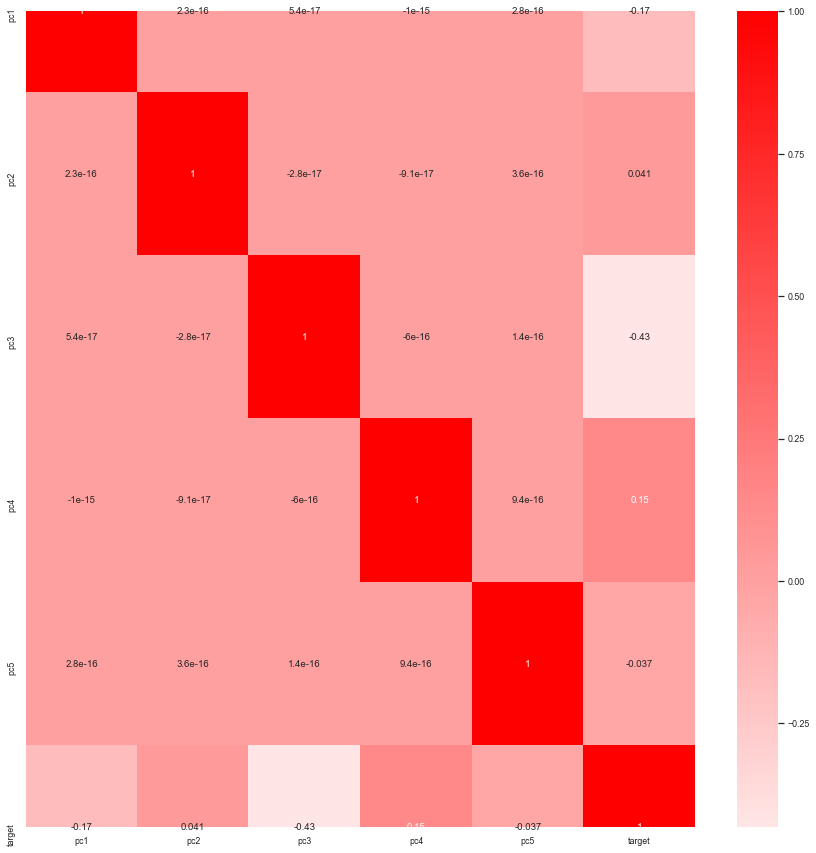

In [50]:
# 다시 한 번 히트맵으로 상관관계 확인
import seaborn as sns

plt.figure(figsize=(15, 15))
cmap = sns.light_palette("red", as_cmap=True)
sns.set(font_scale=0.8)
sns.heatmap(pca_df.corr(), annot=True, cmap=cmap)
plt.show()

In [51]:
scaled_X_train = pca_df.loc[:, 'pc1':'pc5']
scaled_y_train = pca_df.loc[:, 'target']

In [52]:
scaled_X_train.shape

(24000, 5)

In [53]:
scaled_y_train.shape

(24000,)

### 모델 선택 및 분류 성능 평가 확인

##### 차원 축소 이전의 데이터
X_train_final_data = np.array(X_train_final['vectors'].tolist())  
y_train_final_data = np.array(X_train_final['target'].tolist())  

##### 차원 축소 이후의 데이터
scaled_X_train  
scaled_y_train  

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

# 모델 선택
lin_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=2000, random_state=42)
decs_clf = DecisionTreeClassifier(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
sgd_ovr = OneVsRestClassifier(SGDClassifier()) # SGDClassifier 기반으로 OvA 전략 모델

lin_reg2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=2000, random_state=42)
decs_clf2 = DecisionTreeClassifier(random_state=42)
rnd_clf2 = RandomForestClassifier(random_state=42)
sgd_ovr2 = OneVsRestClassifier(SGDClassifier()) # SGDClassifier 기반으로 OvA 전략 모델

#### 차원 축소하기 이전의 데이터

In [ ]:
lin_reg.fit(X_train, y_train)

In [74]:
t = [i for i in range(1, 256)]
t.appen

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
                             
scores = np.zeros(5)
cv = KFold(10, shuffle=True, random_state=0)

for i, (idx_train, idx_test) in enumerate(cv.split(tmp_df)):
    df_train = tmp_df.iloc[idx_train]
    df_test = tmp_df.iloc[idx_test]
    
    model = sm.OLS.from_formula("0 ~ " + "+".join(t), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    y_pred  = opt_lin_reg.predict(re_scaled_X_test)
    y_pred_prob  = opt_lin_reg.predict_proba(re_scaled_X_test)
    rsquared = r2_score(df_test.target, pred)
    
    scores[i] = rsquared

scores

TypeError: sequence item 0: expected str instance, int found

In [ ]:
accuracy_score(re_y_test,y_pred_opt_lin_reg)

#### 차원 축소하고 이후의 데이터

In [ ]:
lin_reg.fit(X_train, y_train)

#### 테스트 데이터 샘플 추출을 위해 우선적으로 자연어처리

In [64]:
split_test_sentence = []
for idx, contents in enumerate(X_test.values):
    data = kc.get_morphemes(body=contents, filter_option=['AJMA','NNIN1','NNIN2','VBMA'])
    split_test_sentence.append(data)
    
print(split_test_sentence)

[['기초', '라인', '수려하다', '사용하다', '보윤', '크림', '전', '사용하다', '사용', '중', '기초', '라인', '사용하다', '향', '좋다', '보습', '지속력', '좋다', '가격', '저렴하다', '산거', '같다'], ['색깔', '예쁘다', '번지다', '좋다'], ['사용하다', '제품', '저렴하다', '구매하다', '가볍다', '촉촉하다'], ['색상', '화사하다', '뻑뻑하다', '감', '있', '립밤', '사용하다'], ['블랙', '색상', '로드샵', '제품', '이랑', '다르다', '고급스럽다', '그려지다', '랑콤', '이벤트', '기간', '구입하다', '그렇다', '샘플', '많다', '감사하다'], ['양', '적다'], ['크림', '특유', '냄새', '좋다', '건성', '무겁다', '유분기', '많다', '크림', '싫어하다', '산뜻하다', '보습잘되다', '좋다'], ['받다', '콜라보', '디자인', '진짜', '예쁘다'], ['요거', '많다', '쿠션', '발리다', '딴건', '누르다', '아혈', '케이스', '고급', '지구', '마켓', '안드로이드', '앱', '작성'], ['좋다', '용량', '많다', '향', '마음', '들다', '성분', '좋다', '좋다', '쓰다', '같다'], ['이쁘다', '보통', '보라색', '피부', '보색격', '엄하다', '걱정하다', '베이스', '컬러', '그레이', '컬러', '가깝다', '베이스', '컬러', '진하다', '펄', '라벤더', '라일락', '그', '오묘하다', '색감', '펄', '애교살', '글리터', '올리다', '튀다', '눈물', '머금다', '듯', '예쁘다', '스틸라', '글리터', '예쁘다', '같다'], ['끈적거리다', '깔끔하다', '디자인', '보기', '좋다', '정도', '쓰다', '효과', '괜찬네여', '다으', '구매', '예정'], ['배송', '빠르다', '저렴하다',

In [65]:
test_length_sentence = []
for idx, sentence in enumerate(split_test_sentence):
    test_length_sentence.append(len(sentence))

np.mean(test_length_sentence)

12.8485

In [66]:
# 평균 길이가 12개이므로 앞, 뒤로 나눠서 6개의 사이즈가 적절
test_model = Word2Vec(split_test_sentence, size=256, iter=3, window=6, negative=5, min_count=1, workers=2, sg=0)
test_model_name = 'beauty_word2vec_test_model'
test_model.save(model_name)

In [67]:
# 텍스트에 해당되는 벡터
test_vectors = test_model.wv
test_vocabs = test_vectors.vocab.keys() # 대표 단어(중복 x)
print(len(test_vocabs))

7249


In [68]:
test_word_vectors_list = [vectors for vectors in test_vectors[test_vocabs]]

In [69]:
X_test_new = pd.DataFrame(columns=['vocabs', 'vectors'])
X_test_new['vocabs'] = split_test_sentence

In [70]:
test_vectors_data = []
for idx, test_data in enumerate(split_test_sentence):
    tmp = []
    for t in test_data:
        tmp.append(test_vectors[t].tolist())
    test_vectors_data.append(np.mean(tmp, axis=0).tolist())

X_test_new['vectors'] = test_vectors_data

In [73]:
X_test2 = X_test_new.loc[:, 'vectors']

In [74]:
# 타겟 데이터프레임 생성
test_target_df = pd.DataFrame(columns=['target'])

for idx, target in enumerate(y_test.values):
    for key, value in target_mapping_table.items():
        if target == key:
            test_target_df.loc[idx, 'target'] = value

test_target_df = test_target_df.astype(int)

In [75]:
y_test2 = test_target_df.loc[:, 'target']

In [76]:
re_X_test = np.array(X_test2.tolist())
re_y_test = np.array(y_test2.tolist())

In [77]:
re_X_test.shape

(6000, 256)

In [78]:
re_y_test.shape

(6000,)

## 5. 모델 세부 튜닝

In [79]:
# 교차 검증을 사용한 하이퍼파라미터 세부 튜닝
from sklearn.model_selection import KFold, GridSearchCV

# 교차 검증을 위해
kfold = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

# 하이퍼파라미터
lin_reg_param = {
    'penalty':      ['l1', 'l2'],
    'C':            [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':       ['liblinear'],
}
decs_clf_param = {
    'max_depth':    np.linspace(1, 32, 32, endpoint=True),
    'max_features': ['auto'],
}
rnd_clf_param = {
    'n_estimators': [100, 300, 500],
    'max_depth':    [2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
}
sgd_clf_param = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'n_iter': [1000],
    'loss': ['log', 'hinge', 'modified_huber'],
    'penalty': ['l2'],
    'n_jobs': [-1]
}

In [80]:
# 모델 선택
lin_reg = LogisticRegression()
svm = SVC()
decs_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier()

In [82]:
# 파라미터 추정
lin_grid_search = GridSearchCV(lin_reg, lin_reg_param, cv=kfold)
lin_grid_search.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [84]:
decs_grid_search = GridSearchCV(decs_clf, decs_clf_param, cv=kfold)
decs_grid_search.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param

In [85]:
rnd_grid_search = GridSearchCV(rnd_clf, rnd_clf_param, cv=kfold)
rnd_grid_search.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_scor

## 6. 모델 평가

In [86]:
# 위에서 구해진 최적의 하이퍼파라미터로 구해진 최적의 모델
opt_lin_reg = lin_grid_search.best_estimator_
# opt_svm = svm_grid_search.best_estimator_
opt_decs_clf = decs_grid_search.best_estimator_
opt_rnd_clf = rnd_grid_search.best_estimator_

In [88]:
# 테스트 데이터 차원 축소
pca_test = PCA(n_components=5)
re_scaled_X_test = pca_test.fit_transform(re_X_test)
re_scaled_X_test.shape

(6000, 5)

In [89]:
# 테스트 세트로 검증
y_pred_opt_lin_reg  = opt_lin_reg.predict(re_scaled_X_test)
# y_pred_opt_svm      = opt_svm.predict(re_scaled_X_test)
y_pred_opt_decs_clf = opt_decs_clf.predict(re_scaled_X_test)
y_pred_opt_rnd_clf  = opt_rnd_clf.predict(re_scaled_X_test)

In [90]:
# 모델들의 예측률 계산
y_pred_opt_lin_reg_prob  = opt_lin_reg.predict_proba(re_scaled_X_test)
# y_pred_opt_svm_prob      = opt_svm.predict_proba(re_scaled_X_test)
y_pred_opt_decs_clf_prob = opt_decs_clf.predict_proba(re_scaled_X_test)
y_pred_opt_rnd_clf_prob  = opt_rnd_clf.predict_proba(re_scaled_X_test)

## 7. 테스트 데이터 검증

#### 테스트 데이터 모델 평가

In [92]:
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             roc_curve)

# 테스트 세트에서 정확도 출력
print("로지스틱 회귀 정확도: {:.3f}".format(accuracy_score(re_y_test,y_pred_opt_lin_reg)))
# print("서포트벡터머신 정확도: {:.3f}".format(accuracy_score(re_y_test,y_pred_opt_svm)))
print("의사결정나무 정확도: {:.3f}".format(accuracy_score(re_y_test,y_pred_opt_decs_clf)))
print("랜덤포레스트 정확도: {:.3f}".format(accuracy_score(re_y_test,y_pred_opt_rnd_clf)))

로지스틱 회귀 정확도: 0.162
의사결정나무 정확도: 0.167
랜덤포레스트 정확도: 0.167


In [93]:
# 테스트 세트에서 오차행렬 출력

lin_reg_confusion_matrix = confusion_matrix(re_y_test,y_pred_opt_lin_reg)
# svm_confusion_matrix = confusion_matrix(re_y_test,y_pred_opt_svm)
decs_clf_confusion_matrix = confusion_matrix(re_y_test,y_pred_opt_decs_clf)
rnd_clf_confusion_matrix = confusion_matrix(re_y_test,y_pred_opt_rnd_clf)

print("로지스틱 회귀 오차행렬: \n{}".format(lin_reg_confusion_matrix))
# print("서포트벡터머신 오차행렬: \n{}".format(svm_confusion_matrix))
print("의사결정나무 오차행렬: \n{}".format(decs_clf_confusion_matrix))
print("랜덤포레스트 오차행렬: \n{}".format(rnd_clf_confusion_matrix))

로지스틱 회귀 오차행렬: 
[[  0   0 821   0   0 179]
 [  0   0 731   0   0 269]
 [  0   0 695   0   0 305]
 [  0   0 776   0   0 224]
 [  0   0 674   0   0 326]
 [  0   0 722   0   0 278]]
의사결정나무 오차행렬: 
[[  0   0 100   0 900   0]
 [  0   0  45   0 955   0]
 [  0   0  51   0 949   0]
 [  0   0  51   0 949   0]
 [  0   0  51   0 949   0]
 [  0   0  75   0 925   0]]
랜덤포레스트 오차행렬: 
[[   0    0    0 1000    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0 1000    0    0]]


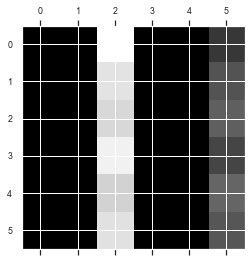

In [94]:
plt.matshow(lin_reg_confusion_matrix, cmap=plt.cm.gray)

In [95]:
lin_reg_conf_row_sum = lin_reg_confusion_matrix.sum(axis=1, keepdims=True)
norm_lin_reg_conf = lin_reg_confusion_matrix / lin_reg_conf_row_sum

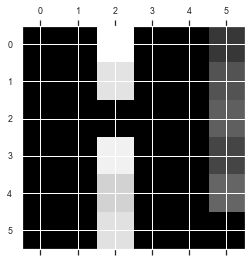

In [96]:
np.fill_diagonal(norm_lin_reg_conf, 0)
plt.matshow(norm_lin_reg_conf, cmap=plt.cm.gray)
plt.show()

In [ ]:
# plt.matshow(svm_confusion_matrix, cmap=plt.cm.gray)

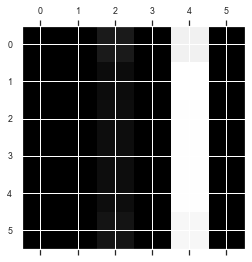

In [97]:
plt.matshow(decs_clf_confusion_matrix, cmap=plt.cm.gray)

In [98]:
decs_clf_conf_row_sum = decs_clf_confusion_matrix.sum(axis=1, keepdims=True)
norm_decs_clf_conf = decs_clf_confusion_matrix / decs_clf_conf_row_sum

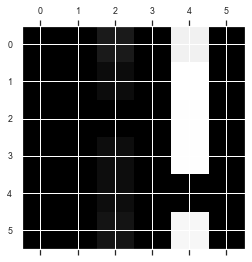

In [99]:
np.fill_diagonal(norm_decs_clf_conf, 0)
plt.matshow(norm_decs_clf_conf, cmap=plt.cm.gray)
plt.show()

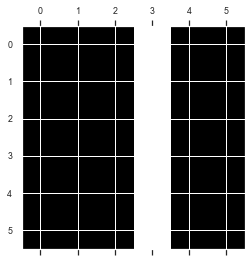

In [100]:
plt.matshow(rnd_clf_confusion_matrix, cmap=plt.cm.gray)

In [101]:
rnd_clf_conf_row_sum = rnd_clf_confusion_matrix.sum(axis=1, keepdims=True)
norm_rnd_clf_conf = rnd_clf_confusion_matrix / rnd_clf_conf_row_sum

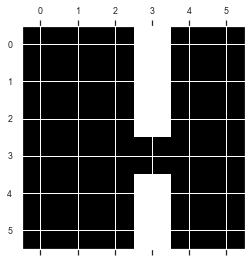

In [102]:
np.fill_diagonal(norm_rnd_clf_conf, 0)
plt.matshow(norm_rnd_clf_conf, cmap=plt.cm.gray)
plt.show()

In [ ]:
# 테스트 세트에서 ROC 곡선 그래프 출력
fpr_lin, tpr_l, thresholds = roc_curve(y_test,
                                       y_pred_opt_lin_reg_prob[: , 1],
                                       pos_label= 1)

fpr_svm, tpr_s, thresholds = roc_curve(y_test,
                                       y_pred_opt_svm_prob[: , 1],
                                       pos_label= 1)

fpr_dcs, tpr_d, thresholds = roc_curve(y_test,
                                       y_pred_opt_decs_clf_prob[: , 1],
                                       pos_label= 1)

fpr_rnd, tpr_r, thresholds = roc_curve(y_test,
                                       y_pred_opt_rnd_clf_prob[: , 1],
                                       pos_label= 1)


fig = plt.figure(figsize=(20, 15))


ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], ls="--")


ax.set_xlabel('False Positive Rate', fontsize=25)
ax.set_ylabel('True Positive Rate', fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('ROC curve for multiple models', fontsize=30)

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

ax.plot(fpr_lin, tpr_l, label = "lin", linewidth=5)
ax.plot(fpr_svm, tpr_s, label = "svm", linewidth=5)
ax.plot(fpr_dcs, tpr_d, label = "dcs", linewidth=5)
ax.plot(fpr_rnd, tpr_r, label = "rnd", linewidth=5)

ax.legend(loc="lower right", fontsize=45)

plt.show()

In [106]:
tsne2 = TSNE(n_components=2, random_state=42)
tsne_results2 = tsne2.fit_transform(scaled_X_train)

In [107]:
labels2 = pca_df['target'].values

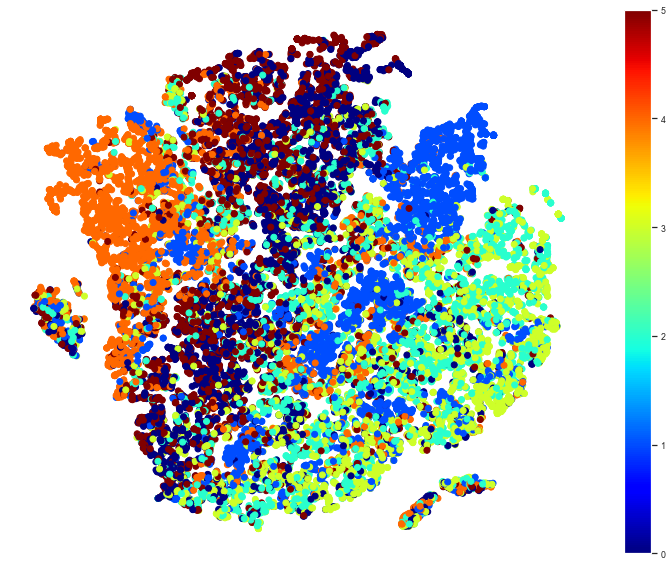

In [108]:
plt.figure(figsize=(13, 10))
plt.scatter(tsne_results2[:, 0], tsne_results2[:, 1], c=labels2, cmap="jet")
plt.axis("off")
plt.colorbar()

plt.show()

In [111]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 5))
    plt.axis("off")

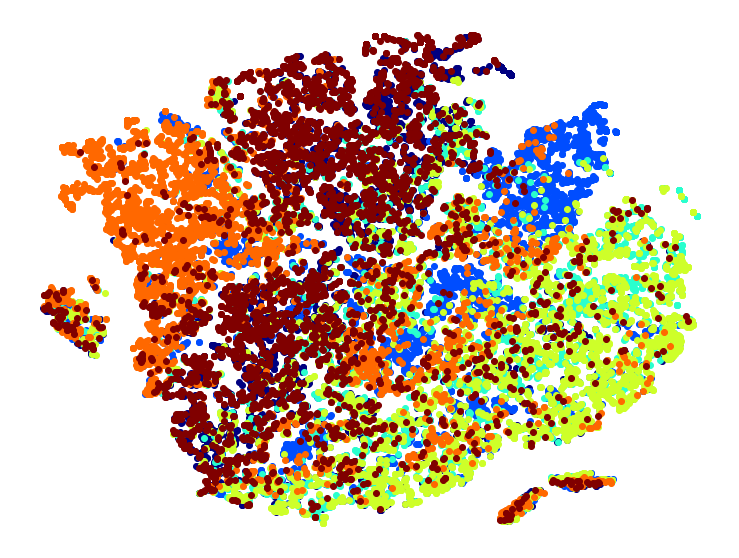

In [112]:
from sklearn.pipeline import Pipeline

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

X_pca_tsne_reduced = pca_tsne.fit_transform(scaled_X_train)

plot_digits(X_pca_tsne_reduced, scaled_y_train)

plt.show()

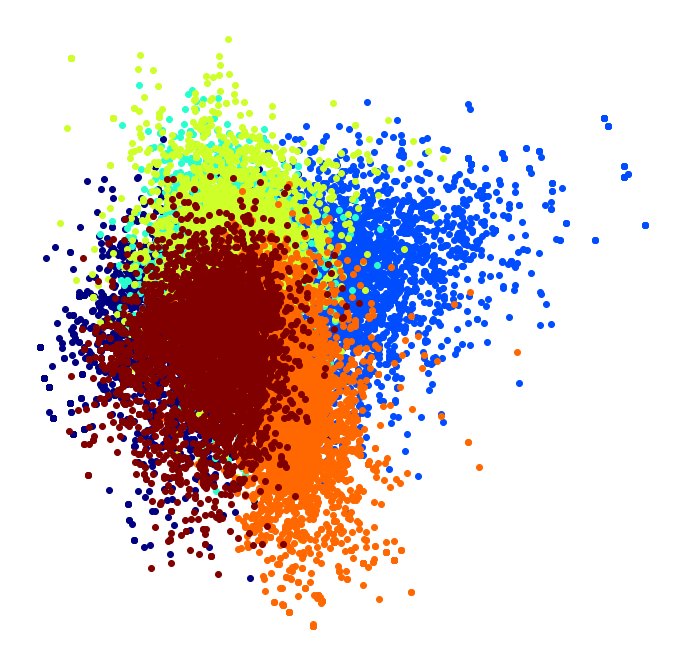

In [113]:
# LDA 차원 축소 알고리즘 적용하여 시각화 결과 비교

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(scaled_X_train, scaled_y_train)

plot_digits(X_lda_reduced, scaled_y_train, figsize=(12, 12))

plt.show()

In [1]:
from sklearn.cluster import DBSCAN

transformed = TSNE(learning_rate=300).fit_transform(scaled_X_train)
predict = DBSCAN(eps=2.4, min_samples=100).fit(transformed)
y_pred = predict.labels_

# Assign result to df
dataset = pd.DataFrame({'Column1':transformed[:,0],'Column2':transformed[:,1]})
dataset['cluster_num'] = pd.Series(predict.labels_)

plot_digits(y_pred, scaled_y_train)

NameError: name 'TSNE' is not defined